<a href="https://colab.research.google.com/github/YuvBindal/NUS-SDS-Datathon-Champion/blob/main/DATA_DESTROYERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install google
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

# Data Cleaning

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd
#file_path = '/content/drive/My Drive/catA_train.csv'
#dataset = pd.read_csv(file_path)
dataset = pd.read_csv('catA_train.csv') #Akshat's dataset
dataset.head()


,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


In [4]:
dataset.shape

(29182, 28)

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [6]:
dataset.isna().sum()


LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [7]:
dataset = dataset.drop('Square Footage', axis = 1)

In [8]:
dataset = dataset.dropna(subset = ['LATITUDE', 'LONGITUDE', 'Employees (Domestic Ultimate Total)'])

In [9]:
(dataset['Employees (Single Site)'] > dataset['Employees (Domestic Ultimate Total)']).sum() + (dataset['Employees (Single Site)'] > dataset['Employees (Global Ultimate Total)']).sum()


12038

In [10]:
dataset['Employees (Global)'] = dataset[['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)']].max(axis = 1)


In [11]:
dataset.drop(columns = ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)', 'Fiscal Year End'], inplace = True)

In [12]:
dataset['Import/Export Status'].fillna('N/A', inplace = True)

In [13]:
dataset = dataset[dataset['Company Status (Active/Inactive)'] == 'Active']


In [14]:
dataset.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Company Status (Active/Inactive),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Employees (Global)
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,Active,2.209224e+06,4.637871e+06,N/A,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,25.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,Active,7.093536e+09,7.093536e+09,N/A,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,100.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,Active,1.026308e+06,1.026308e+06,N/A,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,4.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,Active,7.339898e+10,7.339898e+10,N/A,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,100.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,Active,4.322130e+05,4.322130e+05,Exports,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,4.0


# Placeholders

In [15]:
#correlation heatmap to identify significant columns
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = dataset.corr()
figure=plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True,fmt=".1g")
plt.show()

ValueError: could not convert string to float: 'LAKB2BID4559214'

In [ ]:
#1. Adding "not applicable" to import/export status of companies that do not import/export
def update_import_export_status(row):
    if pd.isna(row['Import/Export Status']):
        return 'not applicable'
    else:
        return row['Import/Export Status']

dataset['Import/Export Status'] = dataset.apply(update_import_export_status, axis=1)

In [ ]:
dataset.head()

In [ ]:
#dropping fiscal year end
dataset.drop(columns=['Fiscal Year End'], inplace=True)


In [16]:
#Webscraping dataset
from pprint import pprint
import requests
from bs4 import BeautifulSoup

list_countries = list(dataset['Global Ultimate Country'].unique())
scraped_gdps = {}

def google_search(query):
    url = f"https://www.google.com/search?q={query} gdp per capita"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Content-Type': 'application/json', 'Accept-Encoding': 'deflate'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve search results. Status code: {response.status_code}")
        return None

def extract_figure_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the element with class "ayqGOc" and extract the text
    figure_element = soup.find('div', class_='ayqGOc')

    if figure_element:
        figure_text = figure_element.get_text(strip=True)
        return figure_text
    else:
        print("Figure element not found.")
        return None

def apply_function(query):
  html_content = google_search(query)
  if html_content:
    return extract_figure_from_html(html_content)
  return -1


for country in list_countries:
  figure = apply_function(country)
  scraped_gdps.update({country: figure})




pprint(scraped_gdps)



Figure element not found.
Figure element not found.
Figure element not found.
{nan: None,
 'Antigua and Barbuda': '15,781.40 USD (2021)',
 'Australia': '60,443.11 USD (2021)',
 'Austria': '53,637.71 USD (2021)',
 'Bahamas': '27,478.39 USD (2021)',
 'Bahrain': '26,562.97 USD (2021)',
 'Bangladesh': '2,457.92 USD (2021)',
 'Belgium': '51,247.01 USD (2021)',
 'Belize': '6,228.27 USD (2021)',
 'Bermuda': '114,090.33 USD (2021)',
 'Brazil': '7,507.16 USD (2021)',
 'Brunei Darussalam': '31,449.08 USD (2021)',
 'Canada': '51,987.94 USD (2021)',
 'Cayman Islands': '86,568.77 USD (2021)',
 'Chile': '16,265.10 USD (2021)',
 'China': '12,556.33 USD (2021)',
 'Croatia': '17,685.33 USD (2021)',
 'Curacao': '17,717.60 USD (2021)',
 'Cyprus': '31,551.82 USD (2021)',
 'Denmark': '68,007.76 USD (2021)',
 'Estonia': '27,943.70 USD (2021)',
 'Finland': '53,654.75 USD (2021)',
 'France': '43,658.98 USD (2021)',
 'Germany': '51,203.55 USD (2021)',
 'Greece': '20,192.60 USD (2021)',
 'Hong Kong SAR': '49,80

In [17]:
scraped_gdps['Taiwan'] = '32,756.000 USD (2021)'
scraped_gdps['Virgin Islands (British)'] = '39,552.17 USD (2020)'

In [18]:
dataset['GDP per Capita'] = dataset['Global Ultimate Country'].map(scraped_gdps)

In [ ]:
dataset.drop(columns=['AccountID', '8-Digit SIC Code', 'Industry'], inplace=True)


In [ ]:
dataset.head()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [19]:
import numpy as np
import pandas as pd
#Define a list of sentences to be embedded

def calculate_avg_embedding(sentence):
  # Generate embeddings for the sentences
  embeddings = embed([sentence])
  averaged_embeddings = np.mean(embeddings, axis=1)
  return float(averaged_embeddings)




In [ ]:
dataset['Company Description'] = dataset['Company Description'].apply(calculate_avg_embedding)


In [ ]:
dataset['Company Description']

In [ ]:
dataset.head()

In [ ]:
#Catboost model [Company, Parent Company, Global Ultimate]

#convert sic code to categorical dataset
categories = list(dataset['SIC Code'].unique())
dataset['SIC Code'] = pd.Categorical(dataset['SIC Code'], categories=categories)
dataset['SIC Code'] = dataset['SIC Code'].cat.codes

#categories = list(dataset['Global Ultimate Country'].unique())
#dataset['Global Ultimate Country'] = pd.Categorical(dataset['Global Ultimate Country'], categories=categories)
#dataset['Global Ultimate Country'] = dataset['Global Ultimate Country'].cat.codes

#categories = list(dataset['Import/Export Status'].unique())
#dataset['Import/Export Status'] = pd.Categorical(dataset['Import/Export Status'], categories=categories)
#dataset['Import/Export Status'] = dataset['Import/Export Status'].cat.codes

catboost_dataset = dataset.drop(columns=['Company', 'Parent Company', 'Domestic Ultimate Company', 'Global Ultimate Company', '8-Digit SIC Description', 'GDP per Capita'], axis=1, inplace=False)
#removing 8-Digit SIC description as it is redundant (heatmap shows correlation of 1 between 8-digit and sic code) (add gdp per capita later)

In [ ]:
catboost_dataset.head(10)


In [ ]:
#2,4,5,6,8,11,12,13,14
columns_to_convert = ['Is Domestic Ultimate', 'Is Global Ultimate']
catboost_dataset[columns_to_convert] = catboost_dataset[columns_to_convert].astype(int)


In [ ]:
catboost_dataset.head()

In [ ]:
print(len(list(catboost_dataset['SIC Code'].unique())))

In [ ]:
!pip3 install catboost

In [ ]:
print(catboost_dataset.columns.get_loc('LATITUDE'))
print(catboost_dataset.select_dtypes(include=['object']).columns)
print(catboost_dataset['SIC Code'].dtype)


In [ ]:
pprint(catboost_dataset.isna().sum())
columns_to_convert = ['Year Found', 'Parent Country', 'Global Ultimate Country']

# Convert NaN values to string in specified columns
catboost_dataset[columns_to_convert] = catboost_dataset[columns_to_convert].fillna('NaN').astype(str)


In [ ]:
catboost_dataset.head()

In [ ]:
import catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#categorical features
cat_features = ['SIC Code','Entity Type','Parent Country','Ownership Type','Company Status (Active/Inactive)','Import/Export Status','Global Ultimate Country','Is Domestic Ultimate','Is Global Ultimate']

X = catboost_dataset.drop(columns=['Sales (Global Ultimate Total USD)'])  # Features
y = catboost_dataset['Sales (Global Ultimate Total USD)']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE')
model.fit(train_data, eval_set=test_data, plot=True)
y_pred = model.predict(test_data)

# Evaluate the model (use appropriate metrics for regression)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importance
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance)

In [ ]:
import matplotlib.pyplot as plt


feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature Id'], feature_importance['Importances'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# New section

# Featuring Selection using ML


In [ ]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostRegressor, Pool
target_column = "Sales (Global Ultimate Total USD)"  # Change this to your target column

# Separate features and target
X = dataset.drop(columns=[target_column])
y = dataset[target_column]



# Webscraping + Sentiment Analysis

In [ ]:
#Web scraping to generate sentiment analysis
#export scraped data here and do LLM functions

# Geospatial Analysis

In [ ]:
!pip3 install geopy

In [ ]:
from geopy.geocoders import Nominatim

#make a function get a country from latitude and longtitude

geolocator = Nominatim(user_agent="my_geocoder")

def get_country(lat, lon):
    if pd.notna(lat) and pd.notna(lon):
        try:
            location = geolocator.reverse((lat, lon), language='en', exactly_one=True)
            if location and 'address' in location.raw and 'country' in location.raw['address']:
                return location.raw['address']['country']
        except Exception as e:
            print(f"Error while reverse geocoding: {e}")
    return None


In [ ]:
print(dataset['LATITUDE'].isnull().sum())
print(dataset['LONGITUDE'].isnull().sum())
#drop empty data rows and save into a seperate dataset for geospatial analysis
geo_dataset = dataset.dropna(subset=['LATITUDE', 'LONGITUDE'])


In [ ]:
geo_dataset['country'] = dataset.apply(lambda row: get_country(row['LATITUDE'], row['LONGITUDE']), axis=1)

# More on Geospatial analysis (and other stuff)

Companies in the dataset are located in Singapore. It can be imperative to analyse the population density of different planning areas in Singapore since more densely populated regions can provide more opportunities for sales.

The following chloropeth map shows the map of Singapore by population density. It provides even more evidence for Latitudinal and Longitudinal data to be included in the model.

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

#loading population data
pop = pd.read_csv('population_data.csv')
pop['Planning Area'] = pop['Planning Area'].str.upper()

#making data usable
pop['Density'] = pop['Density'].apply(lambda x: float(x.replace(",", "")))

#geojson data for sg planning area
sg_data = json.load(open('planningarealocations.geojson'))

#adding a key for id to help map the states from geojson file to pop data
for feature in sg_data['features']:
    feature['id'] = feature['properties']['name']
sg_data['features'][0].keys()

#plotting the choropleth map
fig = px.choropleth_mapbox(pop,
                           locations='Planning Area', 
                           geojson=sg_data, 
                           color='Density',
                           color_continuous_scale = px.colors.sequential.Oranges,
                           mapbox_style='open-street-map',
                           center = {'lat': 1.3521, 'lon': 103.8198}, 
                           zoom=10, opacity=0.7
                           )

fig.update_layout(title_text = 'Singapore Planning Areas - Population Density', title_x = 0.5)
fig.show()

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install geopy
!pip install folium

# Correlation Matrix (Company, Industry, Country)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from geopy.geocoders import Nominatim

file_path = 'catA_train.csv'  # replace with your file path
df = pd.read_csv(file_path)

geolocator = Nominatim(user_agent="testUser")

# Convert categorical variables to numeric for correlation calculation
label_encoder = LabelEncoder()
df['Company'] = label_encoder.fit_transform(df['Company'])
df['Industry'] = label_encoder.fit_transform(df['Industry'])
df['Country'] = label_encoder.fit_transform(df['Global Ultimate Country'])

# fetching the country based on latitude and longitude
# df['Country'] = None
# for index, row in df.iterrows():
#     latitude = row['LATITUDE']  # Assuming you have latitude and longitude columns
#     longitude = row['LONGITUDE']

#     # Reverse geocode the coordinates
#     location = geolocator.reverse(f"{latitude}, {longitude}")

#     if location:
#         country = location.raw['address']['country']
#         df.loc[index, 'Country'] = country

# Calculate correlation matrix
corr = df[['Company', 'Industry', 'Country', 'Sales (Global Ultimate Total USD)']].corr()

# Display the correlation matrix
print(corr)

# Visualize the correlation matrix using a heatmap
plt.matshow(corr)
plt.colorbar()
plt.show()

# Correlation b/w Employee and Sales (Domestic, Global)

In [ ]:
import pandas as pd
import numpy as np

file_path = 'catA_train.csv'  # replace with your file path
df = pd.read_csv(file_path)

employee_sales_correlation = df["Employees (Global Ultimate Total)"].corr(df["Sales (Global Ultimate Total USD)"])
employee_sales_correlation_domestic = df["Employees (Domestic Ultimate Total)"].corr(df["Sales (Domestic Ultimate Total USD)"])

N = df.shape[0]

# Calculate threshold for significance at 5% level
threshold = 2 / np.sqrt(N)

employee_sales_correlation_percentage = abs(employee_sales_correlation) * 100
employee_sales_correlation_domestic_percentage = abs(employee_sales_correlation_domestic) * 100

print(f"Correlation between Employees and Sales (Global Ultimate): {employee_sales_correlation:.10f} ({employee_sales_correlation_percentage:.2f}%)")
print(f"Correlation between Employees and Sales (Domestic Ultimate): {employee_sales_correlation_domestic:.10f} ({employee_sales_correlation_domestic_percentage:.2f}%)")
print(f"The threshold for significance at the 5% level is: {threshold:.10f}")


# Check for significance
print("Employee-Sales correlation (Global Ultimate) is likely significant at 5% level:" if abs(employee_sales_correlation) > threshold else "Employee-Sales correlation (Global Ultimate) may not be significant at 5% level.")
print("Employee-Sales correlation (Domestic Ultimate) is likely significant at 5% level:" if abs(employee_sales_correlation_domestic) > threshold else "Employee-Sales correlation (Domestic Ultimate) may not be significant at 5% level.")

# KNN With latitude and year (Doesnt matter tho, since all companies are in the Singapore)

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

file_path = 'catA_train.csv'  
data = pd.read_csv(file_path)

data = data.dropna(subset=["LATITUDE", "LONGITUDE", "Year Found"])


features = data[["LATITUDE", "Year Found"]] 
target = data["Sales (Domestic Ultimate Total USD)"] 


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


knn = KNeighborsRegressor(n_neighbors=5000)


knn.fit(X_train, y_train)

predictions = knn.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


In [ ]:
!pip install seaborn
!pip install folium

# WorldMap with Global Sales (Most refined version and the bottom of this file)

In [ ]:
import folium
from folium.plugins import HeatMap

df = df.dropna(subset=['LATITUDE', 'LONGITUDE', 'Sales (Global Ultimate Total USD)'])

m = folium.Map(location=[0, 0], zoom_start=2)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['Sales (Global Ultimate Total USD)']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=20).add_to(m)

m

# HeatMap with pure coordinates and Total Sales calculated

In [ ]:

file_path = 'catA_train.csv' 
df = pd.read_csv(file_path)

df = df.dropna(subset=['LATITUDE', 'LONGITUDE', 'Sales (Global Ultimate Total USD)', 'Sales (Domestic Ultimate Total USD)'])

df["Total Sales"] = df["Sales (Domestic Ultimate Total USD)"] + df["Sales (Global Ultimate Total USD)"]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["LONGITUDE"], df["LATITUDE"], c=df["Total Sales"], cmap="YlOrBr", s=50, alpha=0.9)

plt.set_cmap('YlOrBr')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.colorbar(label="Total Sales (USD)")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Total Sales")

plt.show()

# Heat Map with Global Sales based on lcoation (Cleaner version). all companies are in the Singapore

In [ ]:
import pandas as pd
import folium

file_path = './catA_train.csv'
df = pd.read_csv(file_path)

# df = df.head(5000)

data = df.dropna(subset=['LATITUDE', 'LONGITUDE',
                 'Sales (Global Ultimate Total USD)', 'Sales (Domestic Ultimate Total USD)']).copy()

# Calculate the weight of each point
# data['weight'] = data['Sales (Global Ultimate Total USD)'] + \
#     data['Sales (Domestic Ultimate Total USD)']

m = folium.Map(zoom_start=2)

for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=row['Sales (Domestic Ultimate Total USD)'] / 10000000000,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

m


# Top 5 growing industries

In [ ]:
import pandas as pd

file_path = './catA_train.csv'
df = pd.read_csv(file_path)

df["Growth Rate"] = df.groupby("Industry")["Sales (Domestic Ultimate Total USD)"].pct_change()

avg_growth_rate = df.groupby("Industry")["Growth Rate"].mean()

median_growth_rate = df.groupby("Industry")["Growth Rate"].median()

std_dev_growth_rate = df.groupby("Industry")["Growth Rate"].std()

growth_metrics = pd.DataFrame({
    "Average Growth Rate": avg_growth_rate,
    "Median Growth Rate": median_growth_rate,
    "Standard Deviation": std_dev_growth_rate
})

growth_metrics = growth_metrics.sort_values(by="Average Growth Rate", ascending=False)

print("Top 5 Industries with Highest Average Growth Rate:")
print(growth_metrics.head(5).to_string())


# YUV UPLOAD FORM HERE

# GDP per Capita

In [97]:
pprint(scraped_gdps)

{nan: None,
 'Antigua and Barbuda': '15,781.40 USD (2021)',
 'Australia': '60,443.11 USD (2021)',
 'Austria': '53,637.71 USD (2021)',
 'Bahamas': '27,478.39 USD (2021)',
 'Bahrain': '26,562.97 USD (2021)',
 'Bangladesh': '2,457.92 USD (2021)',
 'Belgium': '51,247.01 USD (2021)',
 'Belize': '6,228.27 USD (2021)',
 'Bermuda': '114,090.33 USD (2021)',
 'Brazil': '7,507.16 USD (2021)',
 'Brunei Darussalam': '31,449.08 USD (2021)',
 'Canada': '51,987.94 USD (2021)',
 'Cayman Islands': '86,568.77 USD (2021)',
 'Chile': '16,265.10 USD (2021)',
 'China': '12,556.33 USD (2021)',
 'Croatia': '17,685.33 USD (2021)',
 'Curacao': '17,717.60 USD (2021)',
 'Cyprus': '31,551.82 USD (2021)',
 'Denmark': '68,007.76 USD (2021)',
 'Estonia': '27,943.70 USD (2021)',
 'Finland': '53,654.75 USD (2021)',
 'France': '43,658.98 USD (2021)',
 'Germany': '51,203.55 USD (2021)',
 'Greece': '20,192.60 USD (2021)',
 'Hong Kong SAR': '49,800.54 USD (2021)',
 'Hungary': '18,728.12 USD (2021)',
 'Iceland': '68,727.64 U

In [115]:
for index, row in dataset.iterrows():
    if pd.isnull(dataset.at[index, 'Global Ultimate Country']):
        continue
    global_country = row['Global Ultimate Country']
    gdp = scraped_gdps[global_country]
    
    #how much to slice depending on the digits
    if len(gdp) == 17:
        slicer = 6
    if len(gdp) == 19:
        slicer = 7
    if len(gdp) == 20: 
        slicer = 8
    if len(gdp) == 21:
        slicer = 9
    gdp = float(gdp[:slicer].replace(",", ""))
    dataset.loc[index, 'GDP per Capita'] = gdp #of global ultimate
dataset.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Employees (Global),GDP per Capita
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,2.209224e+06,4.637871e+06,N/A,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,25.0,46510.2
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,7.093536e+09,7.093536e+09,N/A,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,100.0,72794.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,1.026308e+06,N/A,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,4.0,49800.5
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,7.339898e+10,N/A,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,100.0,72794.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.322130e+05,4.322130e+05,Exports,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,4.0,72794.0


In [162]:
sales_dict = {}
for index, row in dataset.iterrows():
    if row['Global Ultimate Country'] not in sales_dict:
        sales_dict[row['Global Ultimate Country']] = []
    sales_dict[row['Global Ultimate Country']].append(row['Sales (Global Ultimate Total USD)'])

average_sales_country = {}
for country, sales in sales_dict.items():
    if len(sales_dict[country]) < 10: #removing outliers
        continue
    average_sales_country[country] = sum(sales)/len(sales)

average_sales_country

{'United Kingdom': 24490616533.605427,
 'Singapore': 576975767.8093867,
 'Hong Kong SAR': 3379336692.611765,
 'France': 1260650071.3694582,
 'Cayman Islands': 966223688.1307421,
 'Switzerland': 5699627201.34717,
 'Norway': 1934133171.0595238,
 'Spain': 467849386.9714286,
 'Denmark': 4713954739.0348835,
 'India': 1515727726.232301,
 'Curacao': 1530593031.8421052,
 nan: 4980219116.851064,
 'United States': 22461012584.849556,
 'Japan': 15008967381.110928,
 'China': 11040940282.066832,
 'Luxembourg': 11750436.941935483,
 'Germany': 14569990772.73055,
 'Virgin Islands (British)': 46176147.43049327,
 'Panama': 467565.0,
 'Netherlands': 2518799911.388199,
 'Italy': 1794733177.78481,
 'Malaysia': 1034202470.2877358,
 'Australia': 2578373117.5429688,
 'Korea, Republic of': 10076571535.482143,
 'Canada': 15508502108.188889,
 'Taiwan': 17336259582.572582,
 'Vietnam': 243984996.92307693,
 'Indonesia': 596017312.125,
 'Sweden': 4365191258.009174,
 'United Arab Emirates': 620577510.3877552,
 'Portu

In [163]:
countries_dataset = pd.DataFrame.from_dict(average_sales_country, orient='index', columns=['Average Sales'])
countries_dataset['GDP per Capita'] = countries_dataset.index.map(scraped_gdps)
# Display the DataFrame
print(countries_dataset)


                          Average Sales         GDP per Capita
United Kingdom             2.449062e+10   46,510.28 USD (2021)
Singapore                  5.769758e+08   72,794.00 USD (2021)
Hong Kong SAR              3.379337e+09   49,800.54 USD (2021)
France                     1.260650e+09   43,658.98 USD (2021)
Cayman Islands             9.662237e+08   86,568.77 USD (2021)
Switzerland                5.699627e+09   91,991.60 USD (2021)
Norway                     1.934133e+09   89,154.28 USD (2021)
Spain                      4.678494e+08   30,103.51 USD (2021)
Denmark                    4.713955e+09   68,007.76 USD (2021)
India                      1.515728e+09    2,256.59 USD (2021)
Curacao                    1.530593e+09   17,717.60 USD (2021)
NaN                        4.980219e+09                   None
United States              2.246101e+10   70,248.63 USD (2021)
Japan                      1.500897e+10   39,312.66 USD (2021)
China                      1.104094e+10   12,556.33 USD

In [164]:
countries_dataset = countries_dataset[countries_dataset.index.notnull()]
countries_dataset

,Average Sales,GDP per Capita
United Kingdom,2.449062e+10,"46,510.28 USD (2021)"
Singapore,5.769758e+08,"72,794.00 USD (2021)"
Hong Kong SAR,3.379337e+09,"49,800.54 USD (2021)"
France,1.260650e+09,"43,658.98 USD (2021)"
Cayman Islands,9.662237e+08,"86,568.77 USD (2021)"
Switzerland,5.699627e+09,"91,991.60 USD (2021)"
Norway,1.934133e+09,"89,154.28 USD (2021)"
Spain,4.678494e+08,"30,103.51 USD (2021)"
Denmark,4.713955e+09,"68,007.76 USD (2021)"
India,1.515728e+09,"2,256.59 USD (2021)"


In [165]:
for index, row in countries_dataset.iterrows():
    gdp = row['GDP per Capita']
    #how much to slice depending on the digits
    if len(gdp) == 17:
        slicer = 6
    if len(gdp) == 19:
        slicer = 7
    if len(gdp) == 20: 
        slicer = 8
    if len(gdp) == 21:
        slicer = 9
    gdp = float(gdp[:slicer].replace(",", ""))
    countries_dataset.loc[index, 'GDP per Capita'] = gdp #of global ultimate
countries_dataset.head(5)

,Average Sales,GDP per Capita
United Kingdom,2.449062e+10,46510.2
Singapore,5.769758e+08,72794.0
Hong Kong SAR,3.379337e+09,49800.5
France,1.260650e+09,43658.9
Cayman Islands,9.662237e+08,86568.7


In [166]:
countries_dataset.reset_index(inplace=True)
countries_dataset

,index,Average Sales,GDP per Capita
0,United Kingdom,2.449062e+10,46510.2
1,Singapore,5.769758e+08,72794.0
2,Hong Kong SAR,3.379337e+09,49800.5
3,France,1.260650e+09,43658.9
4,Cayman Islands,9.662237e+08,86568.7
5,Switzerland,5.699627e+09,91991.6
6,Norway,1.934133e+09,89154.2
7,Spain,4.678494e+08,30103.5
8,Denmark,4.713955e+09,68007.7
9,India,1.515728e+09,2256.5


In [167]:
countries_dataset.rename(columns={'index': 'Country'}, inplace=True)
countries_dataset

,Country,Average Sales,GDP per Capita
0,United Kingdom,2.449062e+10,46510.2
1,Singapore,5.769758e+08,72794.0
2,Hong Kong SAR,3.379337e+09,49800.5
3,France,1.260650e+09,43658.9
4,Cayman Islands,9.662237e+08,86568.7
5,Switzerland,5.699627e+09,91991.6
6,Norway,1.934133e+09,89154.2
7,Spain,4.678494e+08,30103.5
8,Denmark,4.713955e+09,68007.7
9,India,1.515728e+09,2256.5


In [168]:
countries_dataset.dtypes

Country            object
Average Sales     float64
GDP per Capita     object
dtype: object

In [169]:
countries_dataset['GDP per Capita'] = countries_dataset['GDP per Capita'].astype('float64')

In [175]:
import numpy as np
countries_dataset['Average Sales'] = np.log(countries_dataset['Average Sales'])
countries_dataset['GDP per Capita'] = np.log(countries_dataset['GDP per Capita'])
countries_dataset

,Country,Average Sales,GDP per Capita
0,United Kingdom,23.921556,10.747427
1,Singapore,20.173311,11.195389
2,Hong Kong SAR,21.940945,10.815780
3,France,20.954893,10.684162
4,Cayman Islands,20.688906,11.368694
5,Switzerland,22.463667,11.429453
6,Norway,21.382925,11.398123
7,Spain,19.963657,10.312397
8,Denmark,22.273793,11.127376
9,India,21.139162,7.721570


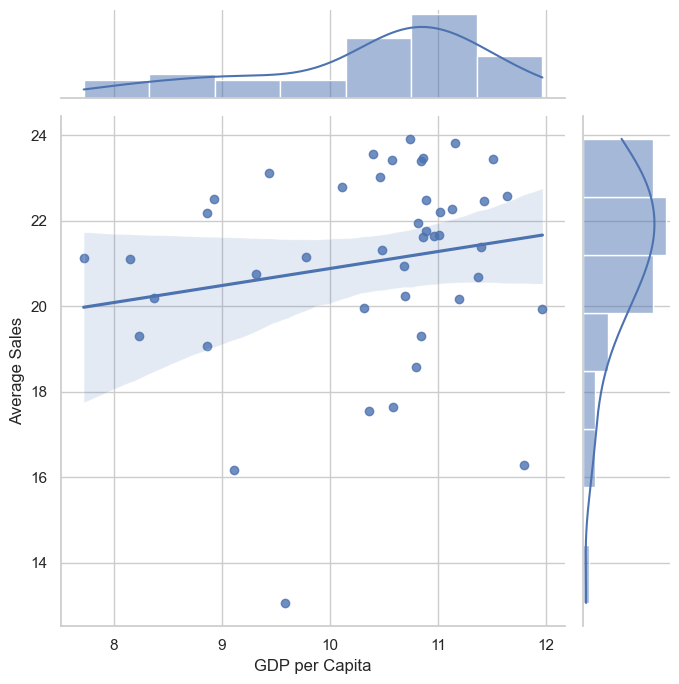

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint plot
sns.set(style="whitegrid")
sns.jointplot(x='GDP per Capita', y='Average Sales', data=countries_dataset, kind="reg", height=7)
plt.show()


In [178]:
# Perform Pearson correlation coefficient test
corr_coefficient, p_value = stats.kendalltau(countries_dataset['GDP per Capita'], countries_dataset['Average Sales'])

# Print the results
print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.2  # Significance level
if p_value < alpha:
    print("The correlation is statistically significant, and the relationship is not likely due to random chance.")
else:
    print("The correlation is not statistically significant, and the relationship may be due to random chance.")


Pearson correlation coefficient: 0.14587737843551796
P-value: 0.1627843101802081
The correlation is statistically significant, and the relationship is not likely due to random chance.


# TILL HERE

# Company Life Cycle Analysis

## Rationale
Companies can be in different stages of the business cycle, implying different growth rates and potential outcomes. 
1) In the startup phase, companies have the highest risk and probability of failing, but also the potential to have a high growth rate.
2) In the growth phase, probability of failing goes down as only the strong startups survive. The growth rate stabilizes, at a potentially high level.
3) In the maturity phase, sales stabilize and have a low but stable growth rate, perhaps at the long term gdp growth rate. Companies in the growth phase can potentially outgrow companies in the maturity phase due to the difference in growth rates.
4) In the decline phase, sales start to decline at a low to medium high growth rate.

## Hypothesis
Business cycle phase of the company can significantly impact strength of sales and outcome.

To test this hypothesis, we categorized companies into 4 divisions: Startup, Growth, Maturity, Decline by calculating their age and using knowledge of marketing to get a rough range for these phases. 
Then, we conducted the ANOVA test to derive the significance of output.

Finally, we report that the results of the test are statistically significant with a p-value of 1.1734886251208667e-11 below our 5% level of significance. We reject the null hypothesis in favour of the alternative hypothesis that business cycle affects sales. 

In [ ]:
import numpy as np

In [ ]:
dataset['Business Life Cycle'] = np.nan
dataset.head(5)

In [ ]:
#Assigning a phase to a particular age range
for index, row in dataset.iterrows():
    if not row['Year Found']: 
        continue
    age = 2024 - row['Year Found']
    if age <= 3:
        dataset.loc[index, 'Business Life Cycle'] = 'Startup'
    elif age <= 15:
        dataset.loc[index, 'Business Life Cycle'] = 'Growth'
    elif age <= 25:
        dataset.loc[index, 'Business Life Cycle'] = 'Maturity'
    else:
        dataset.loc[index, 'Business Life Cycle'] = 'Decline'

dataset.head(5)


In [ ]:
#Hypothesis Test for Business Life Cycle
from scipy.stats import f_oneway
# Prepare the data for the ANOVA test
categories = dataset['Business Life Cycle'].unique()
hypothesis = [dataset[dataset['Business Life Cycle'] == category]['Sales (Global Ultimate Total USD)'] for category in categories]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*hypothesis)

# Print the F-statistic and p-value
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
business_cycle = dataset['Business Life Cycle']
sales = dataset['Sales (Global Ultimate Total USD)']
plt.scatter(business_cycle, sales)
plt.xlabel('Business Cycle')
plt.ylabel('Sales')
plt.title('Scatter Plot of Business Cycle vs. Sales')
plt.show()

# Global Ultimate Chain Analysis

# Rationale

Companies in a global ultimate chain (which, for simplicity, we define as the the list of companies which report the same global ultimate) have the possibility of sharing resources, information and knowledge. Moreover, they may have synergistic values, by complementing each other's operations, which is the reason for a corporate hierarchy in the first place.
Thus, companies in a large global ultimate chain may be more efficient.

# Hypothesis

Companies in a larger global ultimate chain have an advantage over companies with a smaller chain.

To test this hypothesis, we first collated a dictionary of all companies with the same global ultimate company. We created a new column called 'Associated Companies' which shows the number of companies in that company's global ultimate chain.

Then we assessed the relationship between number of associated companies with efficiency of that company, by using Employees to Sales Ratio.

Finally, we find that the result sare statistically significant in favour of our hypothesis with a p-value of 0.

In [ ]:
dataset['Sales to Employees Ratio'] = dataset['Sales (Global Ultimate Total USD)']/dataset['Employees (Global)']
dataset['Associated Companies'] = np.nan
dataset.head(5)

In [ ]:
companies_list = list(dataset['Company'])

global_ultimate_dict = {}
for index, row in dataset.iterrows():
    if row['Global Ultimate Company'] not in global_ultimate_dict:
        global_ultimate_dict[row['Global Ultimate Company']] = 0
    global_ultimate_dict[row['Global Ultimate Company']] += 1
    

In [ ]:
for index, row in dataset.iterrows():
    dataset.loc[index, 'Associated Companies'] = global_ultimate_dict[row['Global Ultimate Company']]

dataset.head(5)

In [ ]:
x = dataset['Associated Companies']
y = dataset['Sales to Employees Ratio']
plt.scatter(x, y)
plt.xlabel('Number of Associated Companies')
plt.ylabel('Sales to Employees')
plt.title('Distribution of Number of Associated Companies vs. Sales to Employees Ratio')
plt.show()

Relationship is not linear. So, we use Spearman's rank correlation coefficient.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
# Calculate Spearman's rank correlation coefficient
tau, p_value = kendalltau(x, y)

# Print the correlation coefficient and p-value
print(f"Spearman's r: {tau}, p-value: {p_value}")

### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [ ]:
###...code...###

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    result = []
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!